Viewer App
----

In [1]:
from os.path import dirname, join
from pprint import pprint

import numpy as np
import ipywidgets as ipyw
import matplotlib.pyplot as plt
import pydicom
from pydicom.data import get_testdata_files
from pydicom.filereader import read_dicomdir

In [2]:
class ImageSliceViewer3D:
    """ 
    From: https://github.com/esmitt/VolumeSliceViewer
    
    ImageSliceViewer3D is for viewing volumetric image slices in jupyter or
    ipython notebooks. 
    
    User can interactively change the slice plane selection for the image and 
    the slice plane being viewed. 

    Argumentss:
    Volume = 3D input image
    figsize = default(8,8), to set the size of the figure
    cmap = default('gray'), string for the matplotlib colormap. You can find 
    more matplotlib colormaps on the following link:
    https://matplotlib.org/users/colormaps.html
    
    """
    
    def __init__(self, volume, figsize=(100,100), cmap='gray'):
        self.volume = volume
        self.figsize = figsize
        self.cmap = cmap
        self.v = [np.min(volume), np.max(volume)]
        
        # Call to select slice plane
        ipyw.interact(self.views)
    
    def views(self):
        self.vol1 = np.transpose(self.volume, [1,2,0])
        self.vol2 = np.rot90(np.transpose(self.volume, [2,0,1]), 3) #rotate 270 degrees
        self.vol3 = np.transpose(self.volume, [0,1,2])
        maxZ1 = self.vol1.shape[2] - 1
        maxZ2 = self.vol2.shape[2] - 1
        maxZ3 = self.vol3.shape[2] - 1
        ipyw.interact(self.plot_slice, 
            z1=ipyw.IntSlider(min=0, max=maxZ1, step=1, continuous_update=False, 
            description='Axial:'), 
            z2=ipyw.IntSlider(min=0, max=maxZ2, step=1, continuous_update=False, 
            description='Coronal:'),
            z3=ipyw.IntSlider(min=0, max=maxZ3, step=1, continuous_update=False, 
            description='Sagittal:'))

    def plot_slice(self, z1, z2, z3):
        # Plot slice for the given plane and slice
        f,ax = plt.subplots(1,3, figsize=self.figsize)
        #print(self.figsize)
        #self.fig = plt.figure(figsize=self.figsize)
        #f(figsize = self.figsize)
        ax[0].imshow(self.vol1[:,:,z1], cmap=plt.get_cmap(self.cmap), 
            vmin=self.v[0], vmax=self.v[1])
        ax[1].imshow(self.vol2[:,:,z2], cmap=plt.get_cmap(self.cmap), 
            vmin=self.v[0], vmax=self.v[1])
        ax[2].imshow(self.vol3[:,:,z3], cmap=plt.get_cmap(self.cmap), 
            vmin=self.v[0], vmax=self.v[1])
        plt.show()


Imports
---

In [3]:
import nibabel as nib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Parameters
----

In [4]:
prefix = '/home/atom/Documents/datasets/brats' # Adam's Station
# laptop /Users/Atom/Dropbox/Skule/EECE571F/Project/data
patient_id = 'Brats18_TCIA09_620_1'
contrast = 't1ce'
tumour = 'LGG'
filename = f'{prefix}/MICCAI_BraTS_2018_Data_Training/{tumour}/{patient_id}/{patient_id}_{contrast}.nii.gz'

Loading Data
---

In [5]:
nii_img  = nib.load(filename)
nii_data = nii_img.get_fdata()

In [6]:
nii_data.shape

(240, 240, 155)

In [7]:
np.max(nii_data)

32767.0

In [8]:
nii_data.T.shape

(155, 240, 240)

Visualizations
---

In [9]:
ImageSliceViewer3D(nii_data.T)

interactive(children=(Output(),), _dom_classes=('widget-interact',))

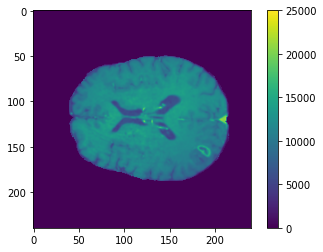

In [34]:
plt.imshow(nii_data[:, :, 80], vmin=0, vmax=25000)
plt.colorbar()
